<a href="https://colab.research.google.com/github/Prashad96/GRIP_Internship/blob/main/Face%20Mask%20Detection/Face%20Mask%20Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARKS FOUNDATION - GRIP - Computer Vision and Internet of Things - JULY 2022

# Name : **PRASHAD S P**
# Task 1 : **Detection of Face Mask**
<hr style="border:2px solid gray">

### Aim:
  > ## To implement the real time Face Mask Detector
<hr style="border:2px solid gray">

## Model used : MobileNetV2
  MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices.

## Dataset used : Face Mask Detection ~12K Images Dataset

## About dataset : 
  The dataset consists of almost 12K images which are almost 328.92MB in size.This dataset is already divided into three  chunks (train, test, validation).
    
    
  ## Dataset URl : [Face Mask Detection ~12K Images Dataset](https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset)

## Importing the required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,SeparableConv2D,DepthwiseConv2D # for Mobilenet model
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model 
import cv2 

## Loading dataset

In [ ]:
# Dataset file path
train_dir = './Dataset/Face Mask Dataset/Train'
test_dir = './Dataset/Face Mask Dataset/Test'
val_dir = './Dataset/Face Mask Dataset/Validation'

In [ ]:
#Generate batches of tensor image data with real-time data augmentation.
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2,brightness_range=(0.2,1.2))
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='binary',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='binary',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='binary',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Importing the Model 
## and Customizing Deep Neural Network

In [ ]:
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(128,128,3)) #Customizing image shape and Neural network
model = Sequential()
model.add(mobilenet)
model.add(SeparableConv2D(512,4))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
for layer in mobilenet.layers:
    layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 separable_conv2d (Separable  (None, 1, 1, 512)        676352    
 Conv2D)                                                         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

## Compiling Model 

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics =["accuracy"])

## Training the model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator)//32,
    epochs=5,
    validation_data=val_generator
  )

Epoch 1/5
9/9 [==============================] - 32s 3s/step - loss: 0.4760 - accuracy: 0.8056 - val_loss: 0.2115 - val_accuracy: 0.9162
Epoch 2/5
9/9 [==============================] - 21s 3s/step - loss: 0.2164 - accuracy: 0.9167 - val_loss: 0.1359 - val_accuracy: 0.9500
Epoch 3/5
9/9 [==============================] - 21s 2s/step - loss: 0.1031 - accuracy: 0.9618 - val_loss: 0.1212 - val_accuracy: 0.9525
Epoch 4/5
9/9 [==============================] - 21s 2s/step - loss: 0.1082 - accuracy: 0.9618 - val_loss: 0.0865 - val_accuracy: 0.9638
Epoch 5/5
9/9 [==============================] - 21s 3s/step - loss: 0.0522 - accuracy: 0.9792 - val_loss: 0.1023 - val_accuracy: 0.9563


## Evaluating the model

In [ ]:
model.evaluate(test_generator)

25/25 [==============================] - 15s 587ms/step - loss: 0.0771 - accuracy: 0.9750


[0.0770995169878006, 0.9750000238418579]

In [ ]:
model.save("")

## Plotting Accuracy and loss

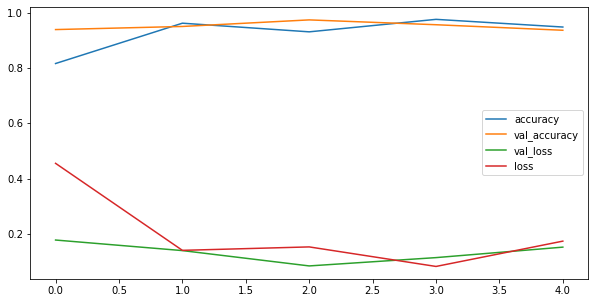

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['accuracy','val_accuracy','val_loss','loss'])

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('face_mask_model_final.h5')

## Testing the Model with Real Time Data

In [ ]:
labels_dict=['No MASK','MASK']
color_dict=[(0,0,255),(0,255,0)]
cap = cv2.VideoCapture(0) #Creates a video capture object, which would help stream or display the video.
while True:
    ok, img = cap.read() # used to read an image or frame
    if not ok:
        print('Video Ending')
        cap.release()
        # Close all window
        cv2.destroyAllWindows()
        break 
    resize = cv2.resize(img,(128,128))# Preprocess image, suitable for the model
    resize = resize/255.
    resize=np.reshape(resize,(1,128,128,3))
    out = model(resize)
    res = np.argmax(out,axis=1)[0]
    # returns index of maximum value
    cv2.putText(img, labels_dict[label], (200,200),cv2.FONT_HERSHEY_SIMPLEX,0.8,color_dict[label],2)
    # Puts the text on the screen with the position of (200,200) and font name
    cv2.imshow('img', img)
    # quit Press Key Q to quit and Close window
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        # Release the VideoCapture object
        cap.release()
        # Close all window
        cv2.destroyAllWindows()
        break


